In [2]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["grid"])

In [3]:
x, y, z = smp.symbols("x y z")

In [4]:
x**2 + y**2


x**2 + y**2

# Taylor Expansion

In [5]:
f = smp.symbols('f', cls=smp.Function)
sum, a = smp.symbols('sum a')

In [6]:
f = 10*x**50
f

10*x**50

In [7]:
sum = 0
a = 10
i = 5
for i in range(i):
    sum += (smp.diff(f, x, i).subs([(x, a)]) / smp.factorial(i))*(x-a)**i
sum
#sum.simplify()
# sum.expand()

5000000000000000000000000000000000000000000000000000*x + 23030000000000000000000000000000000000000000000000000*(x - 10)**4 + 19600000000000000000000000000000000000000000000000000*(x - 10)**3 + 12250000000000000000000000000000000000000000000000000*(x - 10)**2 - 49000000000000000000000000000000000000000000000000000

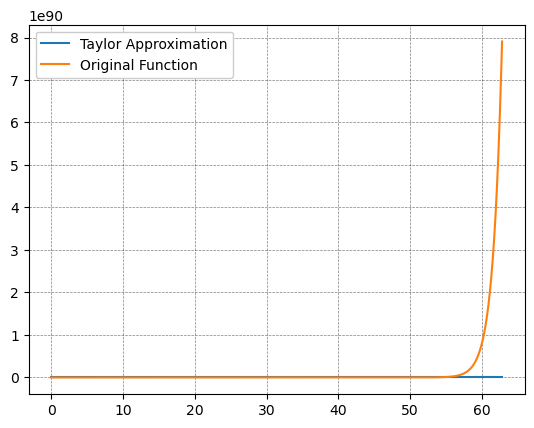

In [8]:
sum_f = smp.lambdify([x], sum)
f_f = smp.lambdify([x], f)
X = np.arange(0, 20*np.pi, 0.1)
Y = sum_f(X)
plt.plot(X, Y, label="Taylor Approximation")
Y = f_f(X)
plt.plot(X, Y, label="Original Function")
plt.legend()
plt.show()

# Taylor series for 2 variables

In [9]:
f = smp.symbols('f', cls=smp.Function)
sum, a, b = smp.symbols('sum a b')

In [10]:
f = smp.exp(x*y)
f

exp(x*y)

In [11]:
sum = 0
degree = 10
a = 0
b = 0
sum = f.series(x, a, degree).removeO().series(y, b, degree).removeO()
sum

x**9*y**9/362880 + x**8*y**8/40320 + x**7*y**7/5040 + x**6*y**6/720 + x**5*y**5/120 + x**4*y**4/24 + x**3*y**3/6 + x**2*y**2/2 + x*y + 1

# Legrange's Multipliers

In [12]:
from sympy.vector import CoordSys3D, gradient

In [13]:
C = CoordSys3D('')
f, g, L1, L2 = smp.symbols('f g L1 L2', cls=smp.Function)
x, y, z = smp.symbols(r'x y z')
lamb, m, n, p, a = smp.symbols(r'\lambda M N P A')

In [14]:
f = C.x**m*C.y**n*C.z**p
g = C.x + C.y + C.z - 9

In [15]:
L1 = gradient(f) - lamb*gradient(g)
L1 = L1.to_matrix(C)
L2 = g
L2

.x + .y + .z - 9

In [16]:
L1 = gradient(f) - lamb*gradient(g)
L1 = L1.to_matrix(C)
L2 = g
sols = smp.solve([L1[0], L1[1], L1[2], L2])
sols

[{\lambda: 9**M*9**N*9**P*M*(M/(M + N + P))**(M - 1)*(N/(M + N + P))**N*(P/(M + N + P))**P/9,
  .x: 9*M/(M + N + P),
  .y: 9*N/(M + N + P),
  .z: 9*P/(M + N + P)}]

In [17]:
list(sols[0].values())[3]

9*P/(M + N + P)

In [30]:
k, r, R = smp.symbols('k r R')
f = (1-(r**2/R**2))*4*smp.pi*r**2
g = smp.integrate(f, r)
g = g / r**2
smp.solve(smp.diff(g, r), r)[1]

sqrt(5)*R/3